
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Thursday, November 29th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please format **your filename to include your EID** (ex. ss324.ipynb or ss324_mj345.ipypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group members:

## Evan David, ead955


## Anuraag Mohile, arm5695

# Question 1 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

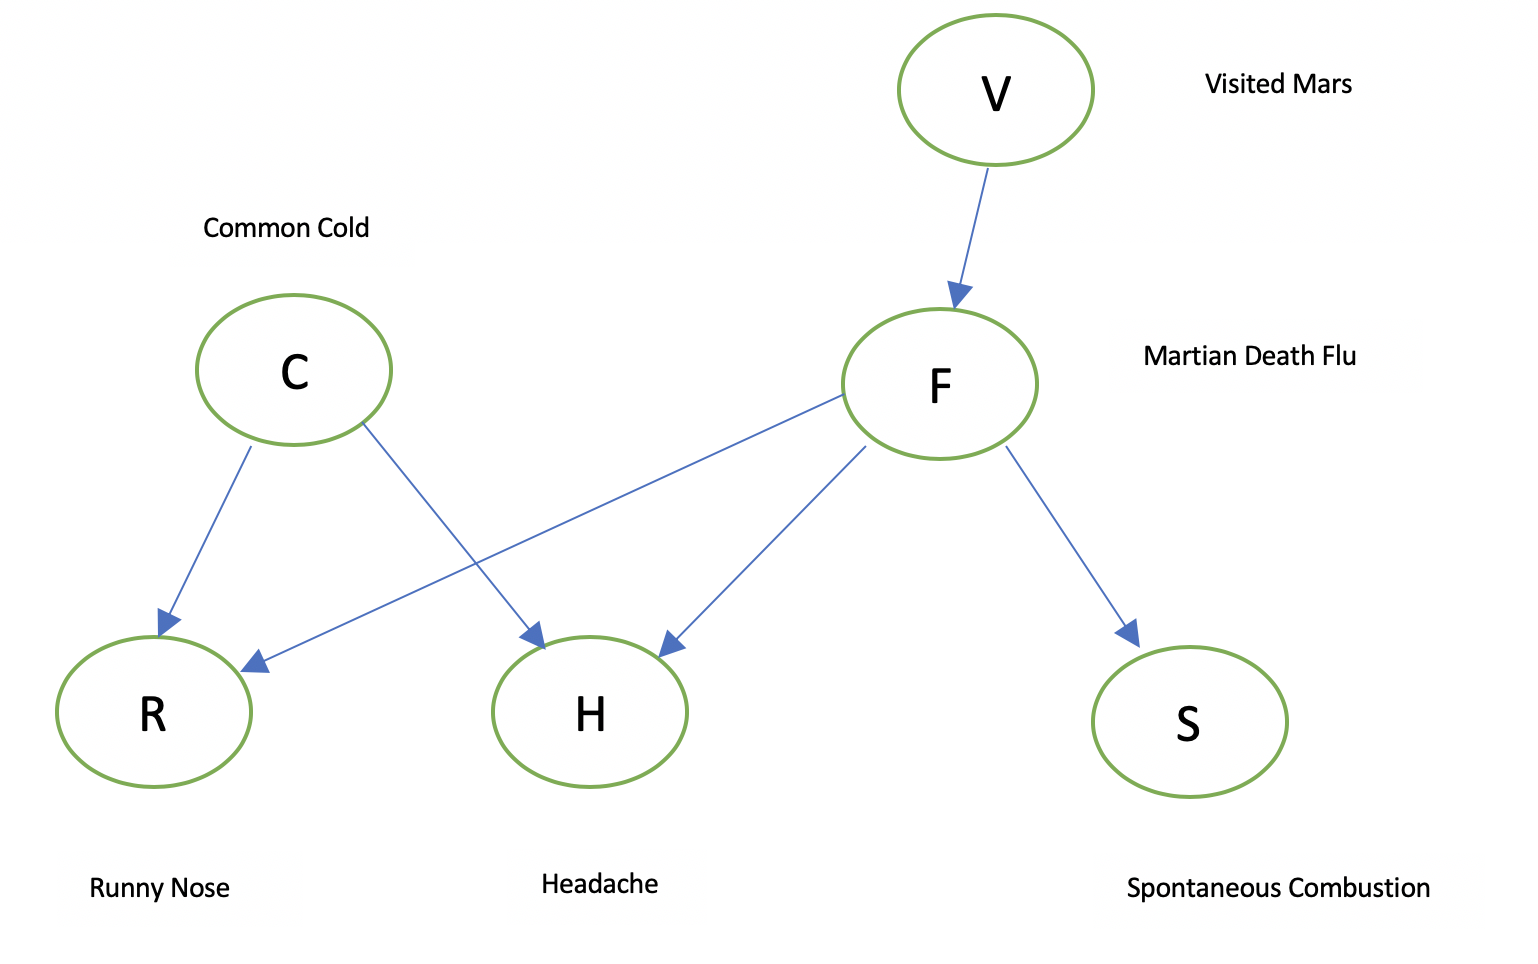

In [41]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


### (a) (5 pts) Find the probability that a person has a headache.

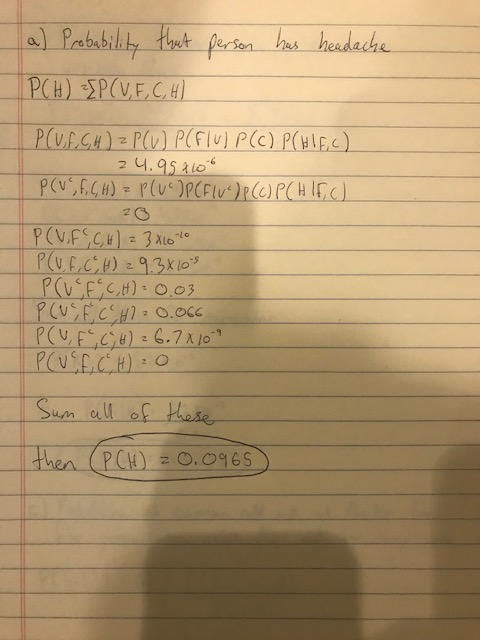

### (b) (5 pts) Given that a person visited Mars, what is the probability that he has a runny nose?

### (c) (5 pts) Given that a person visited Mars and has a runny nose, what is the probability that the person has a common cold and not the Martian Death Flu?

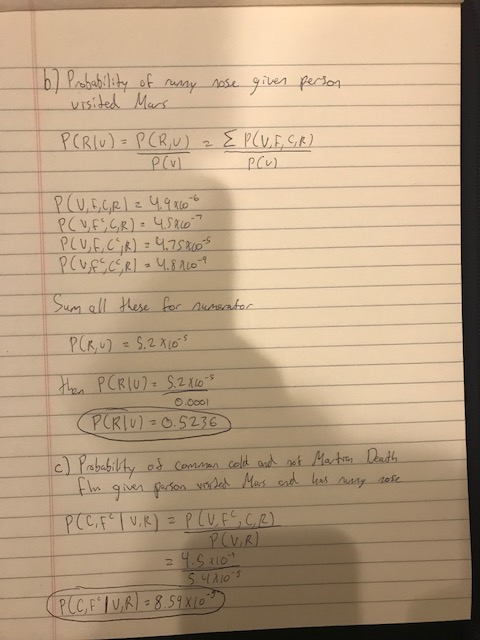

# Question 2 - Support Vector Machine ( 15 points)

## Gender Recognition by voice

In this question, we will try to identify a voice as male or female. The dataset is taken from kaggle [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home). Go ahead and read it to understand the different variables.

 Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('voice.csv')

In [8]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
data.shape

(3168, 21)

In [10]:
X=data.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [11]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (2122, 20) (2122,)
test (1046, 20) (1046,)


### (a) (6pts) Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default.

In [15]:
# grid search over the value of C
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

# use 10-fold cross validation to get the best parameters
clf = GridSearchCV(SVC(kernel = 'linear'), tuned_parameters, cv=10)

# fit the model
clf.fit(X_train, y_train)

# show the best choice for C
print("Best parameters set found on development set: ", clf.best_params_)

Best parameters set found on development set:  {'C': 10}


### (b) (6pts) Repeat (a) but with a Gaussian radial basis kernel.

In [16]:
# radial basis function is the default for this method
clf2 = GridSearchCV(SVC(), tuned_parameters, cv=10)

# fit the model
clf2.fit(X_train, y_train)

# print best params
print('Best parameters found on validation set: ', clf2.best_params_)

Best parameters found on validation set:  {'C': 1}


### (c) (3pts) Summarize the comparative performance (mean error rates) of the classifiers. What can you conclude? (Be brief.)

In [17]:
from sklearn.metrics import mean_absolute_error

# get predictions from linear SVM
y_true, y_pred = y_test, clf.predict(X_test)

# get the mean error for linear SVM
mean_error = mean_absolute_error(y_true, y_pred)

# get predictions for rbf 
y_true2, y_pred2 = y_test, clf2.predict(X_test)

# get the mean error for rbf
mean_error2 = mean_absolute_error(y_true2, y_pred2)

# show the error rates of the classifiers
print ('Mean Error (Linear): ', mean_error)
print ('Mean Error (Radial Basis Function): ', mean_error2)

Mean Error (Linear):  0.022944550669216062
Mean Error (Radial Basis Function):  0.019120458891013385


The classifier with the Gaussian radial basis kernel performed better than the linear SVM, giving a lower mean absolute error, so we can say that rbf performs better than linear on this dataset.

# Question 3 - Ensembles ( 20 points)

In this question, we will compare the performance of different ensemble methods for classification problems: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.








In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv('ensemble-dataset.csv')

In [20]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,0,1.062646,50,2,0.179032,3490,8,1,0,1,1
1,0,0.003591,83,0,0.000869,10352,14,0,0,0,0
2,0,1.000000,22,0,0.000000,100,1,0,0,0,0
3,0,0.000000,52,0,0.336355,7060,10,0,2,0,3
4,0,0.220152,54,0,0.235064,4083,15,0,0,0,1


In [21]:
data.shape

(5049, 11)

In [22]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


### 1. (5pts) Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict whether somebody will experience financial distress in the next two years. Find the best parameters (including *n_estimators* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data. You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. Plot the feature importance as well.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# grid search over the parameters
tuned_parameters = [{'criterion': ['gini','entropy'], 'n_estimators': [5, 10, 50, 100], 'max_depth':[1,2,None,3,4,5]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10)

# fit the model
clf.fit(X_train, y_train)

# show the best choices of parameters
print("Best parameters found on validation set: ", clf.best_params_)

Best parameters found on validation set:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


In [27]:
# get the predicted classes
y_true, y_pred = y_test, clf.predict(X_test)

# get predicted probabilities
y_prob = clf.predict_proba(X_test)

# show confusion matrix
print (confusion_matrix(y_true, y_pred))

[[1550    9]
 [  95   13]]


In [28]:
# show ROC score
print ('ROC Score (Random Forest): ', roc_auc_score(y_true, y_prob[:,1]))

ROC Score (Random Forest):  0.8005666025229847


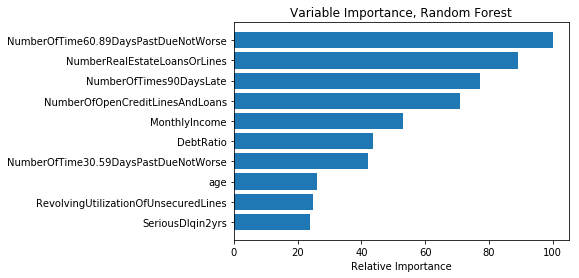

In [29]:
# Plot feature importance
feature_importance = clf.best_estimator_.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data)
plt.xlabel('Relative Importance')
plt.title('Variable Importance, Random Forest')
plt.show()

### 2. (10pts) Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also plot the feature importance for each classifier.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# grid search over the parameters
tuned_parameters = [{'n_estimators': [10, 100, 1000], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [2, 3, 4]}]

clf2 = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=10)

# fit the model
clf2.fit(X_train, y_train)

# show the best choices of parameters
print("Best parameters found on validation set: ", clf2.best_params_)

Best parameters found on validation set:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}


In [32]:
# get the class predictions
y_true2, y_pred2 = y_test, clf2.predict(X_test)

# get the predicted probabilities
y_prob2 = clf2.predict_proba(X_test)

# show the confusion matrix
print (confusion_matrix(y_true2, y_pred2))

[[1556    3]
 [ 106    2]]


In [33]:
# show ROC score
print ('ROC Score (GBDT): ', roc_auc_score(y_true2, y_prob2[:,1]))

ROC Score (GBDT):  0.8319316751003729


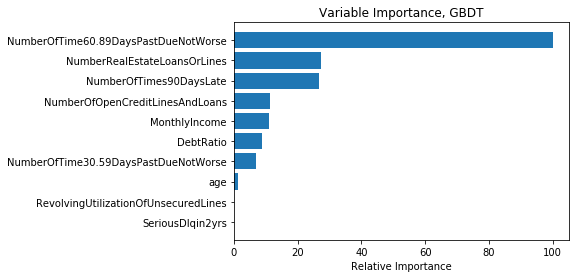

In [34]:
# Plot feature importance
feature_importance = clf2.best_estimator_.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data)
plt.xlabel('Relative Importance')
plt.title('Variable Importance, GBDT')
plt.show()

In [35]:
from sklearn.ensemble import AdaBoostClassifier

# grid search over the parameters
tuned_parameters = [{'n_estimators': [10, 100, 1000], 'learning_rate': [0.01, 0.1, 1]}]

clf3 = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=10)

# fit the model
clf3.fit(X_train, y_train)

# show the best choices of parameters
print("Best parameters found on validation set: ", clf3.best_params_)

Best parameters found on validation set:  {'learning_rate': 0.01, 'n_estimators': 1000}


In [36]:
# get the class predictions
y_true3, y_pred3 = y_test, clf3.predict(X_test)

# get the predicted probabilities
y_prob3 = clf3.predict_proba(X_test)

# show the confusion matrix
print (confusion_matrix(y_true3, y_pred3))

[[1550    9]
 [  92   16]]


In [39]:
# show ROC score
print ('ROC Score (AdaBoost): ', roc_auc_score(y_true3, y_prob3[:,1]))

ROC Score (AdaBoost):  0.8374403107405031


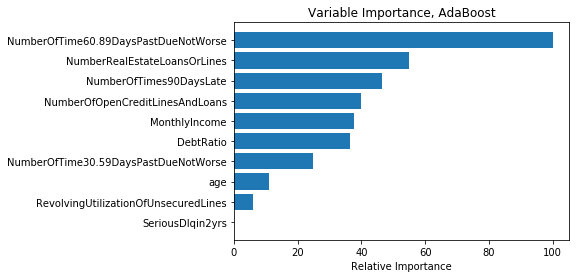

In [40]:
# Plot feature importance
feature_importance = clf3.best_estimator_.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data)
plt.xlabel('Relative Importance')
plt.title('Variable Importance, AdaBoost')
plt.show()

### 3. (5pts) Point out one advantage and one disadvantage of Random Forest compared to GBDT.

Random Forests are faster to train, but they often require deeper trees than GBTs to achieve the same error. GBTs can further reduce the error with each iteration, but they can begin to overfit (increase test error) after too many iterations. Random Forests do not overfit as easily, but their test error plateaus.